# Ejemplo Sistema Bombas Serie
_Gustavo Raush, 2019, UPC-MF_

Bombas en serie permiten alcanzar alturas piezométrica no conseguibles con bombas individuales.

Para los cálculos de pérdidas por fricción considerar un $f = 0.02$.

Esquema de  sistema de serie,

![sistema de bombas serie](./sistema-Bombas-Serie.png)

In [43]:
from math import pi
from math import *
from scipy.constants import g
from scipy.optimize import fsolve
from numpy import mean
from numpy import arange
from numpy import array
from numpy import linspace
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def _area(d):
    return pi*0.25*d**2
 
def _diam(Q,L,H,f=0.02):
    return pow(8*f*L*Q**2/((pi**2)*g*H),1./5.)
 
def _req(d,l,f=0.02):
    return 8*f*l/(pi**2 * g * d**5)
 
def _Re(Q=1,D=0.1,nu=1e-6):
    return float('{:.0f}'.format(4*Q/(pi*nu*D)))
 
def _leq(k,d,f=0.02):
    return k*d/f
 
def Q_from_H(H,rh):
    return sqrt(H/rh)
 
def f_From_Moody(Re=1.e6,er=0.0001): # Diagrama de Moody
    if Re < 2300:
        return 64./Re
    elif ((Re >= 2300) and (Re < 4000)):
        return "Transition Zone"
    else:
        f_initial_guess = 0.02
        x_initial_guess = 1/sqrt(f_initial_guess)
        func = lambda x : x + 2*log10(er/3.71 + 2.51*x/Re)
        x_sol = fsolve(func,x_initial_guess)
        return 1/x_sol[0]**2

## Datos

Ecuaciones de las bombas B1 y B2

In [45]:
Hb1 = lambda q : Hmax1 * (1 - (q/Qmax1)**2) if q<Qmax1 else 0
Hb2 = lambda q : Hmax2 * (1 - (q/Qmax2)**2) if q<Qmax2 else 0

In [46]:
Hmax1 = 25 # m
Hmax2 = 30 # m
Qmax1 = 0.3 # m^3/s
Qmax2 = 0.5 # m^3/s

In [47]:
print('Hb1(%.2f) = %.1f m' % (0.15,Hb1(0.15)))
print('Hb2(%.2f) = %.1f m' % (0.15,Hb2(0.15)))

Hb1(0.15) = 18.8 m
Hb2(0.15) = 27.3 m


In [61]:
q = linspace(0,0.6,50)
hb1 = []
hb2 = []
hbSerie = []
for a in q:
    hb1.append(Hb1(a))
    hb2.append(Hb2(a))
    hbSerie.append(Hb1(a)+Hb2(a))

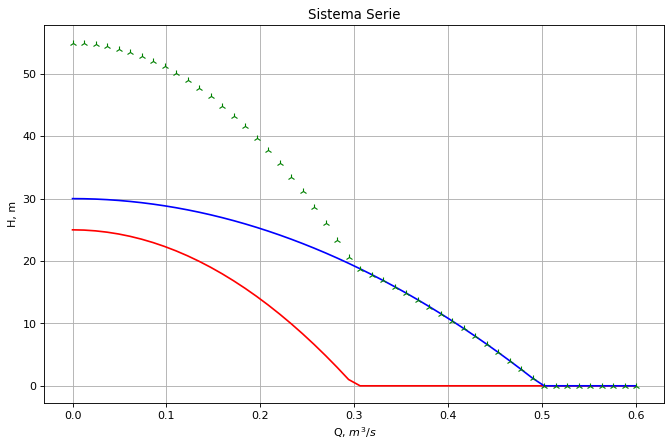

In [62]:
plt.figure(num=None, figsize=(10, 6.25), dpi=80, facecolor='w', edgecolor='k');
plt.plot(q,hb1,'r',q,hb2,'b',q,hbSerie,'g2');
plt.grid()
plt.title("Sistema Serie")
plt.xlabel('Q, $m^3/s$')
plt.ylabel('H, m')
plt.show()

In [65]:
Hsys = lambda q : H + req*q*q # Ecuación del sistema
H = 40    # Altura de cabeza piezométrica del sistema, Hsys
req = 100 # resistencia hidráulica equivalente
hsys = [] # lista para vectorizar las tablas
for a in q:
    hsys.append(Hsys(a))

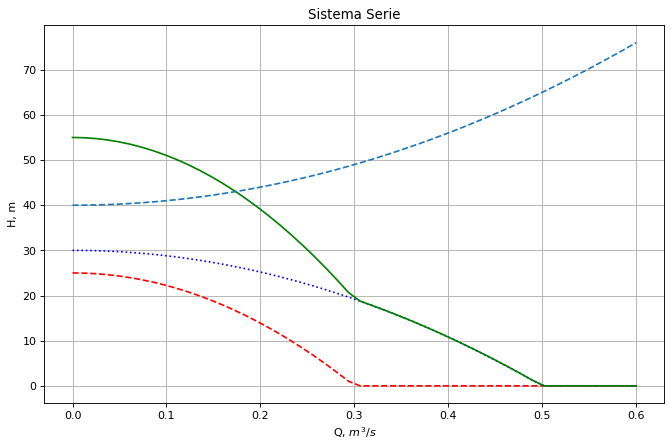

In [66]:
plt.figure(num=None, figsize=(10, 6.25), dpi=80, facecolor='w', edgecolor='k')
plt.plot(q,hb1,'r--',q,hb2,'b:',q,hbSerie,'g',q,hsys,'--')
plt.grid()
plt.title("Sistema Serie")
plt.xlabel('Q, $m^3/s$')
plt.ylabel('H, m')
plt.show()

<h3>Solución Numérica</h3>

Buscamos la igualdad entre las ecuaciones del sistema de bombas y la del sistema.

$$H_{b1}(Q) + H_{b2}(Q) = H_{sys}(Q)$$

$$H_{max1}\left[1- \left(\frac{Q}{Q_{max1}}\right)^2\right] + H_{max2}\left[1- \left(\frac{Q}{Q_{max2}}\right)^2\right] = H_{sys} + r_{eq} Q^2$$ 

In [39]:
Qsol = fsolve(lambda x : Hsys(x) - (Hb1(x) + Hb2(x)),0.15)[0]
print('Qsol = %.3f m^3/s' % Qsol)

Qsol = 0.174 m^3/s


<b>Alturas de bombas</b>

In [52]:
HsolB1 = Hb1(Qsol)
HsolB2 = Hb2(Qsol)
HsolSys = Hsys(Qsol)
print('HsolB1 = %.1f m' % HsolB1)
print('HsolB2 = %.1f m' % HsolB2)
print('Hsys = %.1f m' % HsolSys)

HsolB1 = 16.6 m
HsolB2 = 26.4 m
Hsys = 43.0 m


<b>Potencias en las bombas</b>

$$Pow_{B1} = \frac{\rho g H_{B1} Q_{B1}}{\eta_1}$$

$$Pow_{B2} = \frac{\rho g H_{B2} Q_{B2}}{\eta_1}$$

Potencia en el fluido

$$Pow_{sys} = \rho g H_{sys} Q_{sys}$$





In [59]:
from scipy.constants import g
rho = 1000 # kg/m^3, densidad fluido
eta1 = 0.65
eta2 = 0.6
PowB1 = g * rho * Hb1(Qsol) * Qsol / eta1
PowB2 = g * rho *  Hb2(Qsol) * Qsol / eta2
PowSys = g * rho *  Hsys(Qsol) * Qsol
print('PowB1 = %.0f W' % PowB1)
print('PowB2 = %.0f W' % PowB2)
print('PowSys = %.0f W' % PowSys)

PowB1 = 43553 W
PowB2 = 74858 W
PowSys = 73224 W


<b>Rendimiento del sistema</b>

$$\eta_{sys} = \frac{Pow_{sys}}{Pow_{B1} + Pow_{B2}}$$ 

In [60]:
etaSys = PowSys / (PowB1 + PowB2)
print('%.2f' % etaSys)

0.62
